# Bag of Words in NLP using NLKT

**Bag of Words (BoW) – Background Theory in NLP**

The **Bag of Words** model is a fundamental text representation technique in **Natural Language Processing (NLP)**. It converts text into numerical features by focusing solely on the **occurrence of words** in a document, ignoring grammar, word order, and context.

In BoW:

1. A **vocabulary** (set of unique words) is built from the entire text corpus.
2. Each document is represented as a **vector** whose length equals the vocabulary size.
3. Each position in the vector represents a word from the vocabulary, and the value is usually the **frequency** (count) of that word in the document.

The term "bag" signifies that the model treats text as an unordered collection of words — only **how many times a word appears** matters, not where it appears.

When implemented with **NLTK**, BoW relies on **tokenization** to break text into words and then map them to counts based on the vocabulary. This process creates a **sparse matrix** representation of text, which can be used as input to machine learning algorithms.

The method is **simple and effective** for basic text classification tasks, but it cannot capture **semantic meaning** or **word relationships**.


In [18]:
# Import the libraries:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
paragraph = '''I am Pakistani.I love Pakistan.Pakistan is a Beautifull country.All Pakistani love their Country very much. All the Pakistani's are hard working and joyfull people......'''

In [20]:
# Import the Porter Stemmer():
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
# Create the Bag of words:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()

In [22]:
# Print the output values
print("Feature Array:")
print(X)

print("\nFeature Names:")
print(cv.get_feature_names_out())

Feature Array:
[[1 1 2 0 0 2 1 2 2 0 0]
 [1 0 0 1 1 0 0 0 1 1 1]]

Feature Names:
['all' 'beautifull' 'country' 'hard' 'joyfull' 'love' 'much' 'pakistan'
 'pakistani' 'people' 'working']


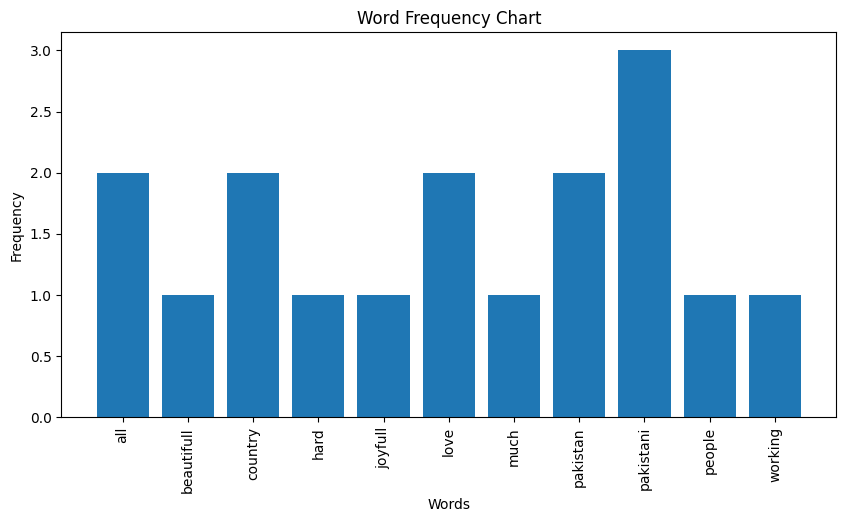

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Sum the occurrences of each word
word_freq = X.sum(axis=0)

# Create a DataFrame for visualization
word_freq_df = pd.DataFrame({'Word': cv.get_feature_names_out(), 'Frequency': word_freq})

# Create a frequency chart
plt.figure(figsize=(10, 5))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'])
plt.xticks(rotation=90)
plt.title('Word Frequency Chart')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()